Contexto: Queremos entender cómo influyen el gasto en publicidad y las visitas al sitio web en las ventas semanales, y usar ese modelo para hacer una predicción.

## 1. Generamos los datos con numpy

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)

n = 100

publicidad_usd = np.random.uniform(500, 10000, n)
visitas_web = np.random.uniform(1000, 20000, n)

# Generamos ventas con relación lineal + ruido
ventas = (
    0.3 * publicidad_usd +
    0.05 * visitas_web +
    np.random.normal(0, 500, n)
)


## 2. Creamos el DataFrame

In [ ]:
data = pd.DataFrame({
    "publicidad_usd": publicidad_usd,
    "visitas_web": visitas_web,
    "ventas": ventas
})

data.head()


,publicidad_usd,visitas_web,ventas
0,4058.131129,1597.154528,957.284704
1,9531.785911,13091.797814,3630.252513
2,7453.942447,6972.763640,2731.357153
3,6187.255600,10662.843132,2032.143128
4,1982.177084,18243.763005,2439.728531


## 3. Exploramos visualmente los datos

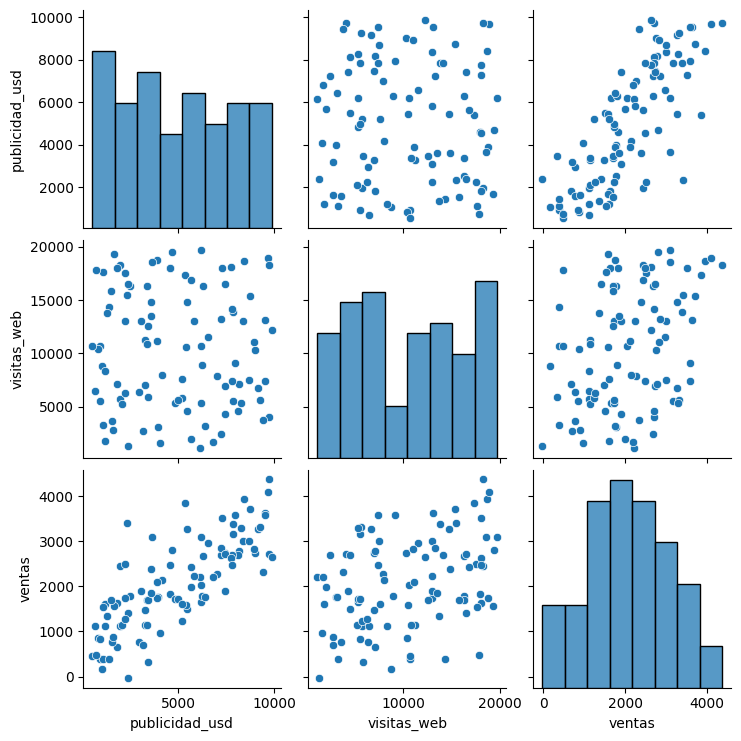

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data)
plt.show()


* Relación entre publicidad y ventas:
Se observa una relación positiva clara entre el gasto en publicidad y las ventas: a mayores niveles de inversión, las ventas tienden a aumentar.
    
    La nube de puntos muestra una tendencia ascendente bastante definida, lo que sugiere que la publicidad es un factor relevante para explicar las ventas.

* Relación entre visitas web y ventas: También existe una relación positiva entre las visitas al sitio web y las ventas, pero es más dispersa que la observada con la publicidad.
    
    Esto indica que, aunque el aumento de visitas suele asociarse a más ventas, no todas las visitas se convierten de manera consistente en compras.

* Independencia relativa entre publicidad y visitas: La relación entre publicidad_usd y visitas_web no muestra un patrón lineal fuerte.
Esto es positivo desde el punto de vista del modelo, ya que sugiere baja colinealidad entre las variables explicativas.


En palabras simples: cada variable aporta información distinta.

## 4. Ajustamos el modelo con statsmodels

In [ ]:
import statsmodels.api as sm

X = data[["publicidad_usd", "visitas_web"]]
y = data["ventas"]

X = sm.add_constant(X)

modelo = sm.OLS(y, X).fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                 ventas   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     154.7
Date:                Thu, 05 Feb 2026   Prob (F-statistic):           6.65e-31
Time:                        13:17:03   Log-Likelihood:                -760.56
No. Observations:                 100   AIC:                             1527.
Df Residuals:                      97   BIC:                             1535.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -54.6315    138.912     -0.

¿Qué tan bueno es el modelo?

- R² = 0.761
- R² ajustado = 0.756

Esto dice que el modelo explica alrededor del 76 % de la variabilidad de las ventas.
Es un ajuste alto para un problema de negocio típico.

Resumen: Con publicidad y visitas web logramos capturar gran parte del comportamiento de las ventas.

Además:
F-statistic significativo (p ≈ 0) → el modelo completo es relevante.

La ecuación del modelo

Según los coeficientes:

ventas=−54.6+0.282⋅publicidad_usd+0.069⋅visitas_web

Interpretación:

* Por cada 1 USD adicional en publicidad, las ventas aumentan en promedio 0.28 unidades, manteniendo constantes las visitas.

* Por cada visita adicional, las ventas aumentan en promedio 0.069 unidades, manteniendo constante la publicidad.

Ambas variables tienen:

* coeficientes positivos
* p-values = 0.000

Es decir: ambas influyen de forma clara y significativa.

El estadístico t mide qué tan grande es un coeficiente en relación a la incertidumbre que tiene.

¿Cuál variable pesa más?

Mirando solo el coeficiente:

* publicidad: 0.282
* visitas: 0.069

Pero están en escalas distintas.


Aun así, el estadístico t muestra:

* publicidad_usd → t = 16.05
* visitas_web → t = 7.73

Sugiere:
la publicidad tiene un efecto más fuerte y más estable en el modelo que las visitas web.

Conclusión final

El modelo de regresión lineal múltiple muestra que tanto la inversión en publicidad como las visitas al sitio web tienen un impacto positivo y estadísticamente significativo en las ventas semanales. La publicidad destaca como el factor con mayor peso explicativo, mientras que las visitas aportan información adicional relevante. En conjunto, el modelo explica alrededor del 76 % de la variabilidad de las ventas, lo que lo convierte en una herramienta útil para análisis y predicción.

## 5. Calculamos métricas de evaluación

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = modelo.predict(X)

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")


MAE: 387.42
MSE: 236417.95
RMSE: 486.23
R²: 0.761


Lectura directa de las métricas

* MAE = 387.42
    En promedio, el modelo se equivoca en unas 387 ventas por semana.

* MSE = 236.417,95
    Es el error al cuadrado promedio. El número es grande porque:
     * está en ventas²
     * penaliza fuertemente los errores grandes

* RMSE = 486.23
    El error típico, castigando más los errores grandes, es de aproximadamente 486 ventas.
    Que el RMSE sea mayor que el MAE es normal: indica que hay semanas donde el modelo se equivoca bastante más.

* R² = 0.761
    El modelo explica el 76% de la variabilidad de las ventas.

Resumen:
El modelo captura bien la tendencia general de las ventas, pero en semanas particulares puede equivocarse en el orden de algunas centenas de ventas.

Conexión con el gráfico y el modelo

Este resultado cuadra con lo visto antes:
* La relación es fuerte → R² alto
* Hay ruido → errores no triviales
* Publicidad manda, visitas acompañan


El modelo es adecuado para análisis y planificación a nivel agregado, pero no para predicciones exactas semana a semana sin considerar otros factores.

## 6. Predicción para una semana concreta

In [ ]:
nueva_semana = pd.DataFrame({
    "const": [1],
    "publicidad_usd": [7500],
    "visitas_web": [15000]
})

prediccion = modelo.predict(nueva_semana)
prediccion


,0
0,3094.415683


El modelo devuelve: ≈ 3.094 ventas

Según el patrón aprendido a partir de los datos históricos, una semana con ese nivel de inversión en publicidad y ese volumen de visitas debería generar del orden de 3.100 ventas.

Dos matices importantes que conviene decir en voz alta (y que suman puntos):

* no es un número exacto, es una estimación promedio
* el error típico del modelo es del orden de 400–500 ventas.

=> Es una buena referencia para planificación, no una promesa exacta.

## 7. ¿Qué variable pesa más?

In [ ]:
modelo.params


,0
const,-54.631458
publicidad_usd,0.282014
visitas_web,0.068929


Interpretación:
* Por cada 1 USD adicional en publicidad → +0.28 ventas
* Por cada 1 visita adicional → +0.069 ventas

Ambas variables ayudan, pero no igual.

¿Cuál pesa más realmente?
* Los coeficientes no están en la misma escala
* USD y visitas no son comparables “tal cual”

Mirando todo junto:  la publicidad tiene un coeficiente mayor
* tiene un estadístico t mucho más alto (lo vimos antes)
* su efecto es más estable

Conclusión:
La publicidad es la variable con mayor peso explicativo en el modelo, mientras que las visitas web actúan como un factor complementario que refuerza las ventas, pero con menor impacto relativo.